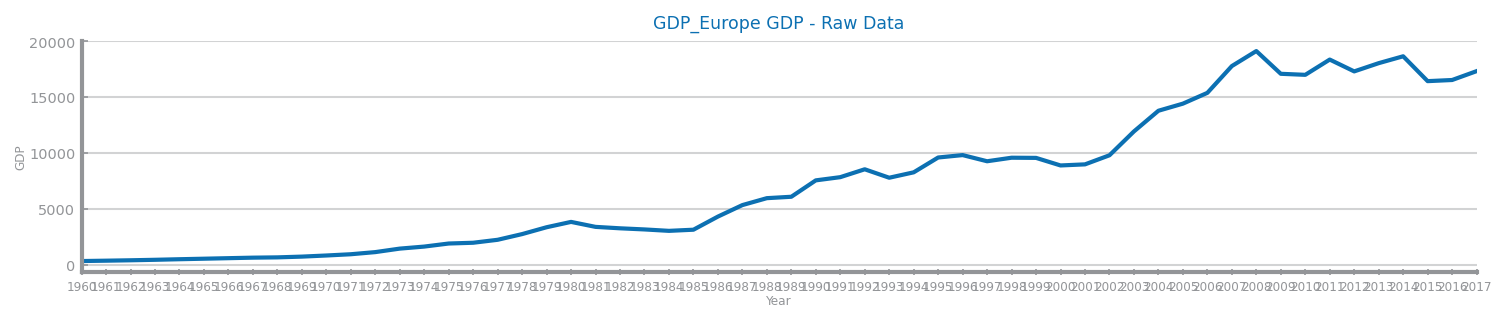

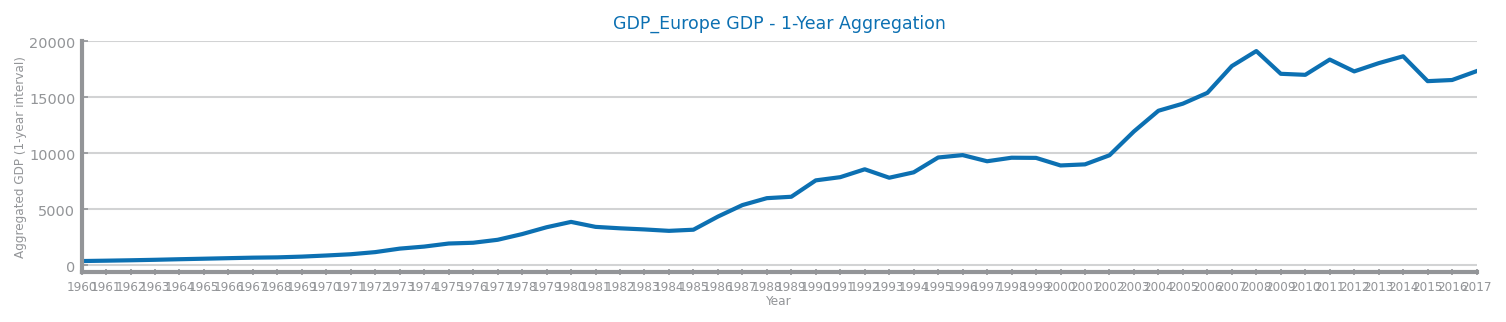

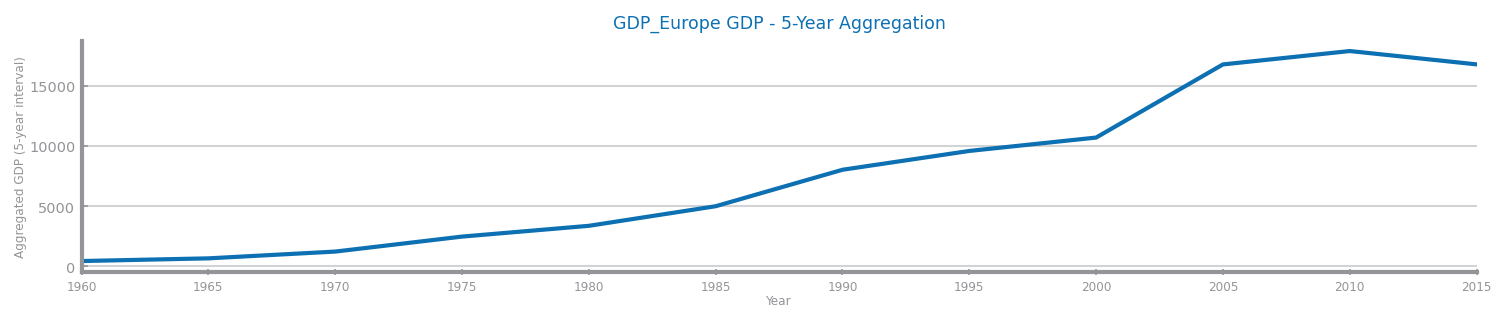

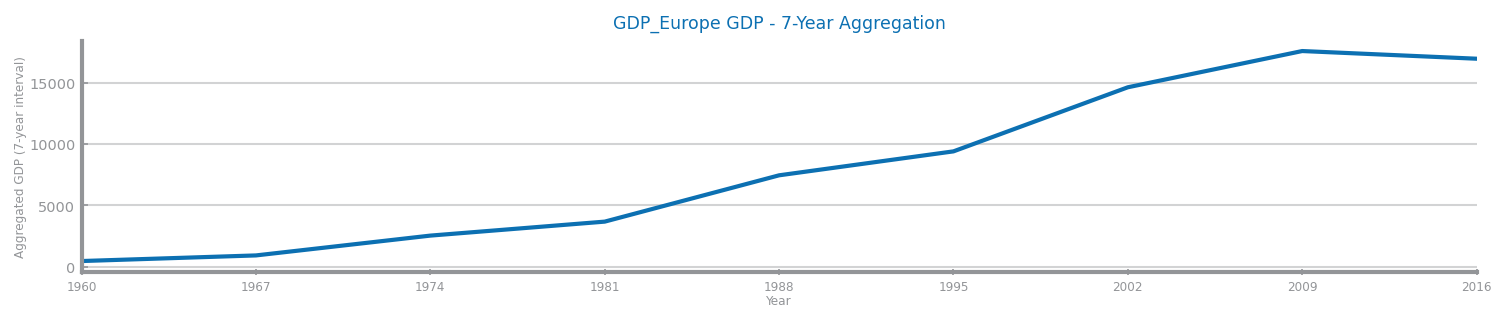

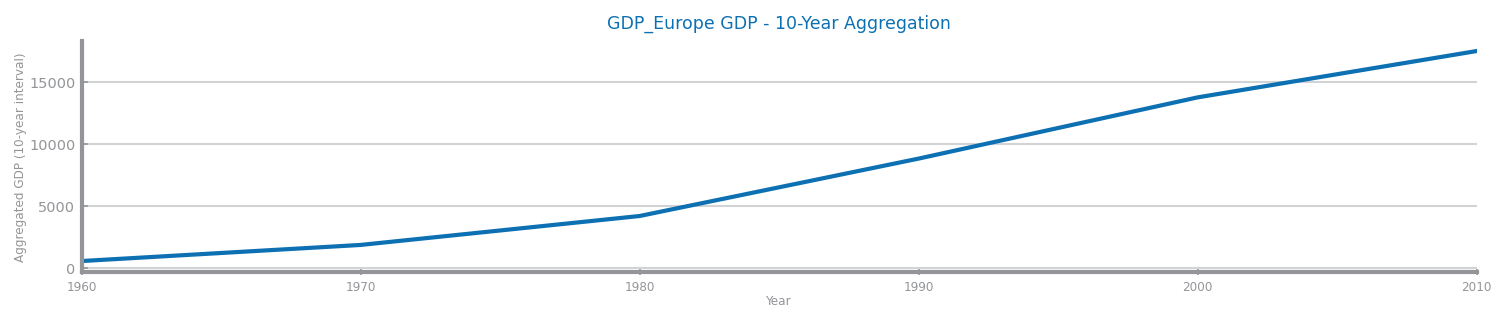

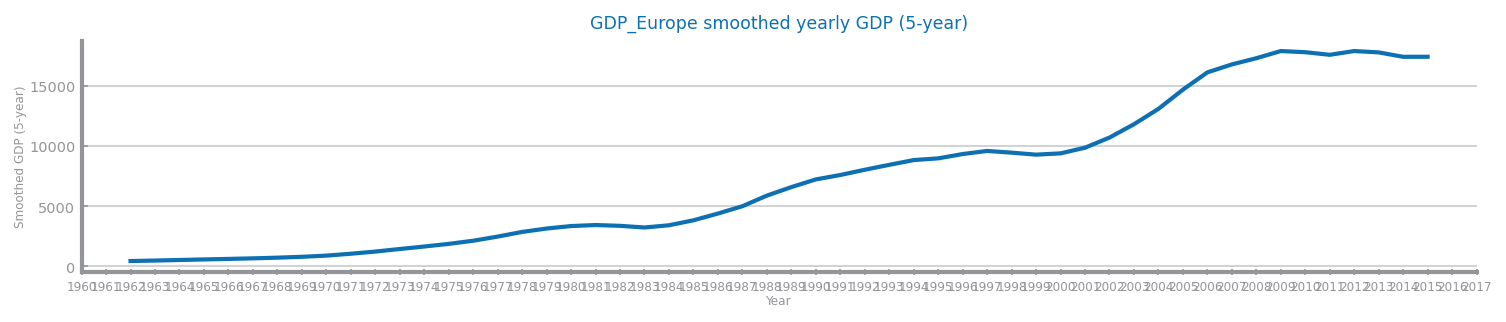

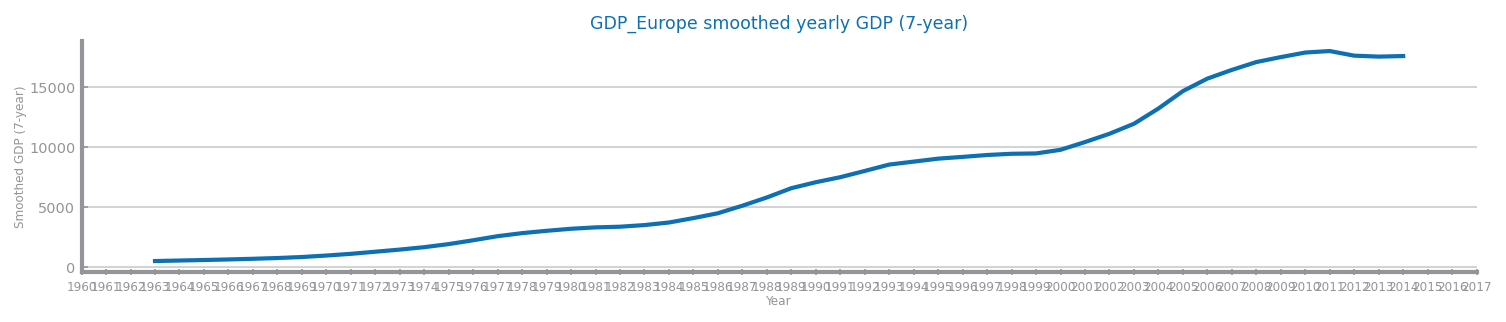

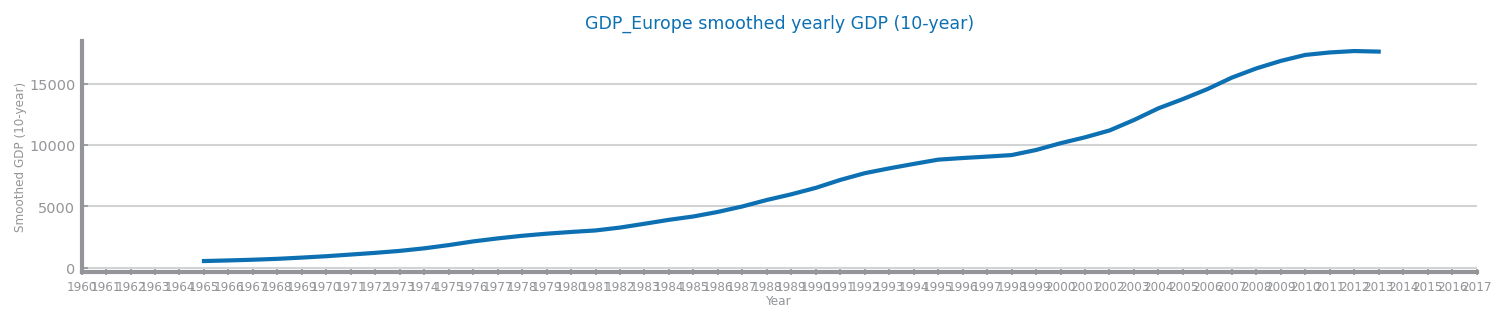

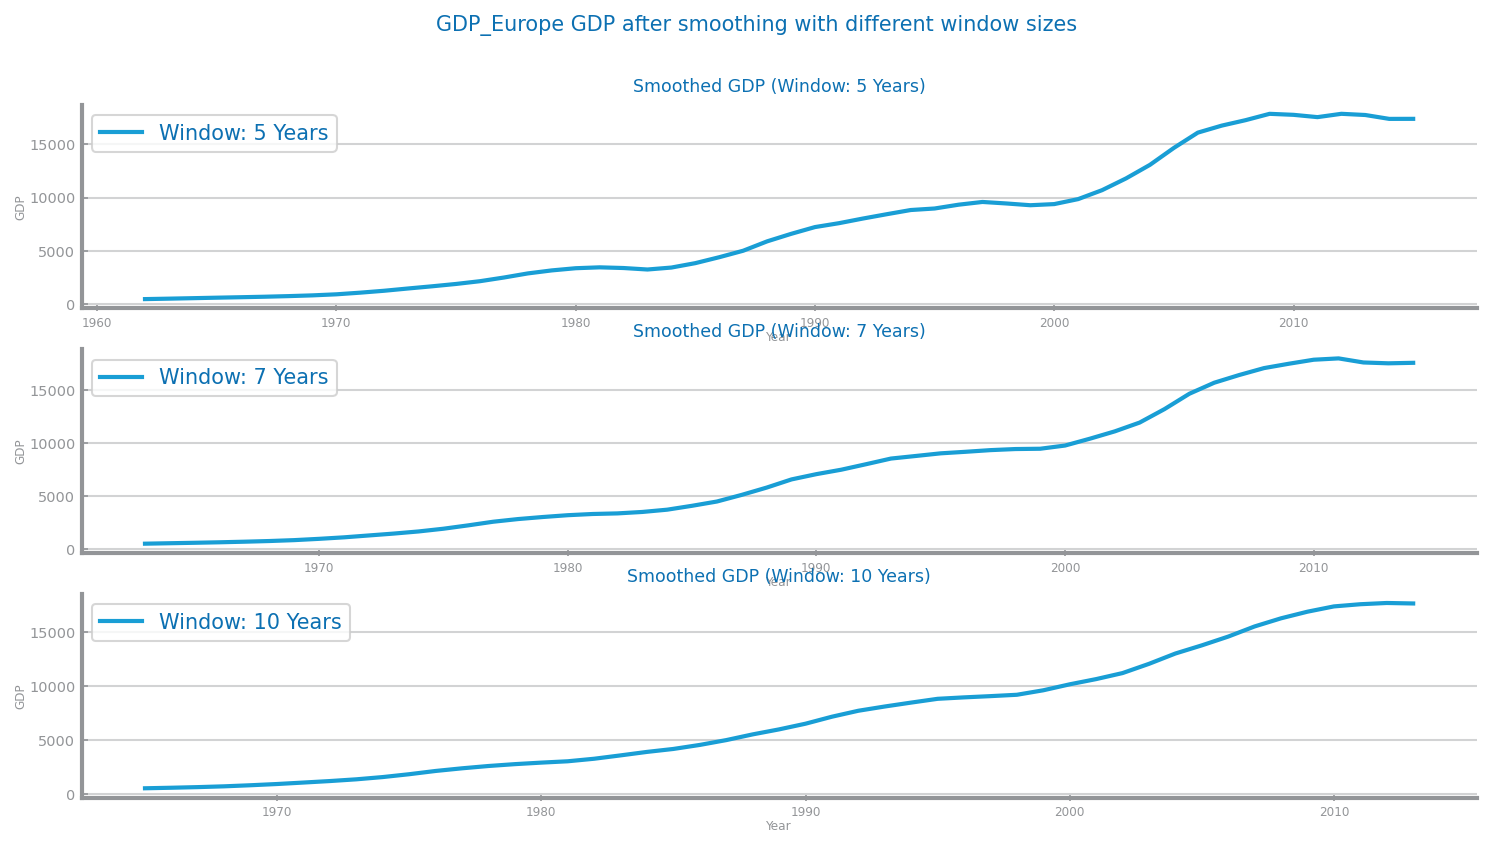

5-year smoothed dataset saved to Smoothed_Datasets/smoothed_5years_aggregated_data.csv
7-year smoothed dataset saved to Smoothed_Datasets/smoothed_7years_aggregated_data.csv
10-year smoothed dataset saved to Smoothed_Datasets/smoothed_10years_aggregated_data.csv


In [3]:
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import figure, show, subplots
from pathlib import Path
from dslabs_functions import plot_line_chart, HEIGHT
import os

# File configurations
file_tag = "GDP_Europe"
filename = "/Users/dominikfrank/Library/Mobile Documents/com~apple~CloudDocs/Desktop/University/Master/Semester 1/PII/Data Science/Code for Project/DataScience/forecast_gdp_europe.csv"
output_dir = Path("output/aggregations")
output_dir.mkdir(parents=True, exist_ok=True)
index = "Year"
data: DataFrame = read_csv(
    filename,
    index_col=index,
    sep=",",
    decimal=".",
    parse_dates=False,
    infer_datetime_format=False,
)

# Function to aggregate data by custom intervals
def aggregate_by_interval(data: DataFrame, interval: int) -> DataFrame:
    aggregated = data.groupby(data.index // interval).mean()
    aggregated.index = aggregated.index * interval  # Adjust the index to represent the interval start
    return aggregated

# Aggregations for 1 year, 5 years, 7 years, and 10 years
intervals = [1, 5, 7, 10]
aggregated_data = {interval: aggregate_by_interval(data, interval) for interval in intervals}

# Save aggregated datasets
for interval, aggregated_df in aggregated_data.items():
    output_path = output_dir / f"aggregated_{interval}_years.csv"
    aggregated_df.to_csv(output_path, index_label=index)

# Plot raw data for the target variable
target = "GDP"
series: Series = data[target]
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    series.index.to_list(),
    series.to_list(),
    xlabel="Year",
    ylabel=target,
    title=f"{file_tag} {target} - Raw Data",
)
show()

# Plot aggregated data for the target variable
for interval, aggregated_df in aggregated_data.items():
    aggregated_series = aggregated_df[target]
    figure(figsize=(3 * HEIGHT, HEIGHT / 2))
    plot_line_chart(
        aggregated_series.index.to_list(),
        aggregated_series.to_list(),
        xlabel="Year",
        ylabel=f"Aggregated {target} ({interval}-year interval)",
        title=f"{file_tag} {target} - {interval}-Year Aggregation",
    )
    show()

# Apply smoothing (example using rolling mean)
smoothed_series_5 = series.rolling(window=5, center=True).mean()
smoothed_series_7 = series.rolling(window=7, center=True).mean()
smoothed_series_10 = series.rolling(window=10, center=True).mean()

# Visualize the smoothed series (5-year window)
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    smoothed_series_5.index.to_list(),
    smoothed_series_5.to_list(),
    xlabel="Year",
    ylabel=f"Smoothed {target} (5-year)",
    title=f"{file_tag} smoothed yearly {target} (5-year)",
)
show()

# Visualize the smoothed series (7-year window)
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    smoothed_series_7.index.to_list(),
    smoothed_series_7.to_list(),
    xlabel="Year",
    ylabel=f"Smoothed {target} (7-year)",
    title=f"{file_tag} smoothed yearly {target} (7-year)",
)
show()

# Visualize the smoothed series (10-year window)
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    smoothed_series_10.index.to_list(),
    smoothed_series_10.to_list(),
    xlabel="Year",
    ylabel=f"Smoothed {target} (10-year)",
    title=f"{file_tag} smoothed yearly {target} (10-year)",
)
show()

# Define different window sizes for comparison
sizes: list[int] = [5, 7, 10]

# Create subplots
fig, axs = subplots(len(sizes), 1, figsize=(3 * HEIGHT, HEIGHT / 2 * len(sizes)))
fig.suptitle(f"{file_tag} {target} after smoothing with different window sizes")

# Apply smoothing for each window size and plot
for i, size in enumerate(sizes):
    smoothed_series = series.rolling(window=size, center=True).mean()
    axs[i].plot(smoothed_series.index, smoothed_series, label=f"Window: {size} Years")
    axs[i].set_title(f"Smoothed {target} (Window: {size} Years)")
    axs[i].set_xlabel("Year")
    axs[i].set_ylabel(target)
    axs[i].legend()

show()

# Save smoothed datasets
output_folder = "Smoothed_Datasets"
os.makedirs(output_folder, exist_ok=True)

# Save the 5-year smoothed dataset
smoothed_data_5 = data.copy()
smoothed_data_5[target] = smoothed_series_5
smoothed_5_filename = os.path.join(output_folder, "smoothed_5years_aggregated_data.csv")
smoothed_data_5.to_csv(smoothed_5_filename, sep=",", decimal=".", index=True)
print(f"5-year smoothed dataset saved to {smoothed_5_filename}")

# Save the 7-year smoothed dataset
smoothed_data_7 = data.copy()
smoothed_data_7[target] = smoothed_series_7
smoothed_7_filename = os.path.join(output_folder, "smoothed_7years_aggregated_data.csv")
smoothed_data_7.to_csv(smoothed_7_filename, sep=",", decimal=".", index=True)
print(f"7-year smoothed dataset saved to {smoothed_7_filename}")

# Save the 10-year smoothed dataset
smoothed_data_10 = data.copy()
smoothed_data_10[target] = smoothed_series_10
smoothed_10_filename = os.path.join(output_folder, "smoothed_10years_aggregated_data.csv")
smoothed_data_10.to_csv(smoothed_10_filename, sep=",", decimal=".", index=True)
print(f"10-year smoothed dataset saved to {smoothed_10_filename}")
